In [90]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
imc_df = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\data\daily\currencies\FX_AUDNZD, D.csv',index_col='time',parse_dates=True)

In [92]:
imc_df.columns

Index(['open', 'high', 'low', 'close', 'AU07Y-NZ07Y, TVC: Open',
       'AU07Y-NZ07Y, TVC: High', 'AU07Y-NZ07Y, TVC: Low',
       'AU07Y-NZ07Y, TVC: Close', 'AU01Y-NZ01Y, TVC: Open',
       'AU01Y-NZ01Y, TVC: High', 'AU01Y-NZ01Y, TVC: Low',
       'AU01Y-NZ01Y, TVC: Close', 'AU05Y-NZ05Y, TVC: Open',
       'AU05Y-NZ05Y, TVC: High', 'AU05Y-NZ05Y, TVC: Low',
       'AU05Y-NZ05Y, TVC: Close', 'AU02Y-NZ02Y, TVC: Open',
       'AU02Y-NZ02Y, TVC: High', 'AU02Y-NZ02Y, TVC: Low',
       'AU02Y-NZ02Y, TVC: Close', 'AU10Y-NZ10Y, TVC: Open',
       'AU10Y-NZ10Y, TVC: High', 'AU10Y-NZ10Y, TVC: Low',
       'AU10Y-NZ10Y, TVC: Close', 'MA', 'Smoothing Line', 'Volume',
       'Volume MA', 'Basic EPS', 'EPS estimates',
       'Average basic shares outstanding', 'Diluted shares outstanding'],
      dtype='object')

In [93]:
imc_df.tail()

,open,high,low,close,"AU07Y-NZ07Y, TVC: Open","AU07Y-NZ07Y, TVC: High","AU07Y-NZ07Y, TVC: Low","AU07Y-NZ07Y, TVC: Close","AU01Y-NZ01Y, TVC: Open","AU01Y-NZ01Y, TVC: High",...,"AU10Y-NZ10Y, TVC: Low","AU10Y-NZ10Y, TVC: Close",MA,Smoothing Line,Volume,Volume MA,Basic EPS,EPS estimates,Average basic shares outstanding,Diluted shares outstanding
time,,,,,,,,,,,,,,,,,,,,,
2023-04-16 21:00:00+00:00,1.07996,1.08502,1.07881,1.08361,-0.887,-0.847,-0.902,-0.850,-1.833,-1.776,...,-0.774,-0.710,1.081244,1.084445,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-17 21:00:00+00:00,1.08361,1.08706,1.08240,1.08311,-0.854,-0.854,-0.921,-0.921,-1.795,-1.773,...,-0.780,-0.780,1.080920,1.084123,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-18 21:00:00+00:00,1.08311,1.08522,1.08113,1.08238,-0.916,-0.901,-0.932,-0.923,-1.817,-1.737,...,-0.811,-0.811,1.080624,1.083797,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-19 21:00:00+00:00,1.08238,1.09236,1.08168,1.09148,-0.907,-0.856,-0.907,-0.856,-1.738,-1.729,...,-0.809,-0.758,1.080547,1.083487,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-20 21:00:00+00:00,1.09148,1.09309,1.08873,1.08933,-0.846,-0.770,-0.846,-0.770,-1.756,-1.734,...,-0.748,-0.664,1.080417,1.083192,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Correlation Heatmap')

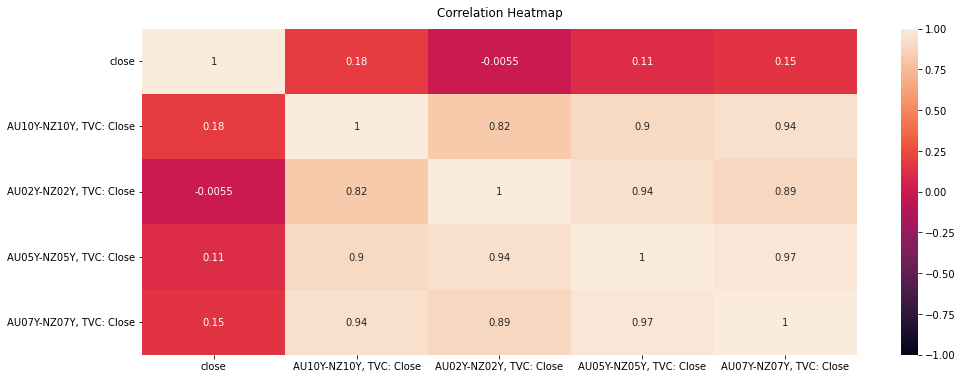

In [94]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(imc_df[['close','AU10Y-NZ10Y, TVC: Close','AU02Y-NZ02Y, TVC: Close','AU05Y-NZ05Y, TVC: Close','AU07Y-NZ07Y, TVC: Close']].corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

Text(0.5, 1.0, 'Correlation Heatmap')

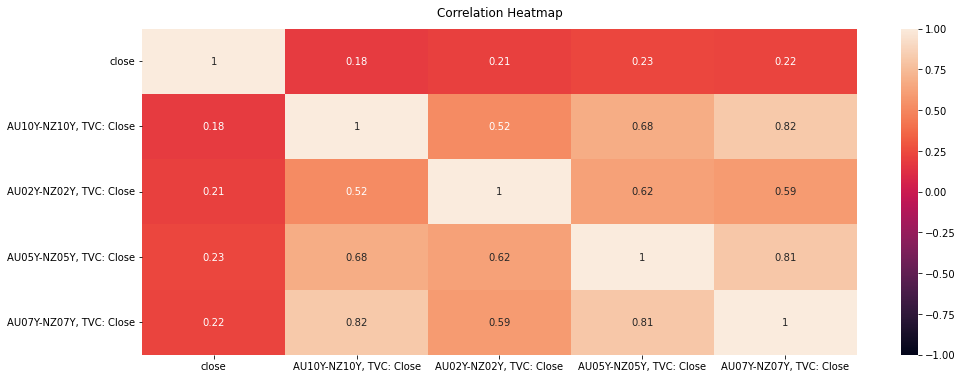

In [95]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(imc_df[['close','AU10Y-NZ10Y, TVC: Close','AU02Y-NZ02Y, TVC: Close','AU05Y-NZ05Y, TVC: Close','AU07Y-NZ07Y, TVC: Close']].diff(1).corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [96]:
from statsmodels.multivariate.pca import PCA

In [97]:
pca_logDiff_df = imc_df[['close','AU10Y-NZ10Y, TVC: Close','AU02Y-NZ02Y, TVC: Close','AU05Y-NZ05Y, TVC: Close','AU07Y-NZ07Y, TVC: Close']].diff(1).dropna(axis=0)

In [98]:
pca_event = {

    'nComp':4,
    'dataframe':r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\data\daily\currencies\FX_AUDNZD, D.csv',
    'constant_correlation':True,
    'column':'ZC1!, CBOT: Close',
}

In [99]:
pc = PCA(pca_logDiff_df,ncomp=pca_event['nComp'])

In [100]:
forecast=0
for i in range(1,pca_event['nComp']):
    forecast+= pc.factors['comp_'+str(i)]# pc.eigenvecs['eigenvec_'+str(i)][i]* # I think this could be wrong here RESEARCH AND FIX


In [101]:
len(forecast.cumsum()*imc_df['close'][0])

1807

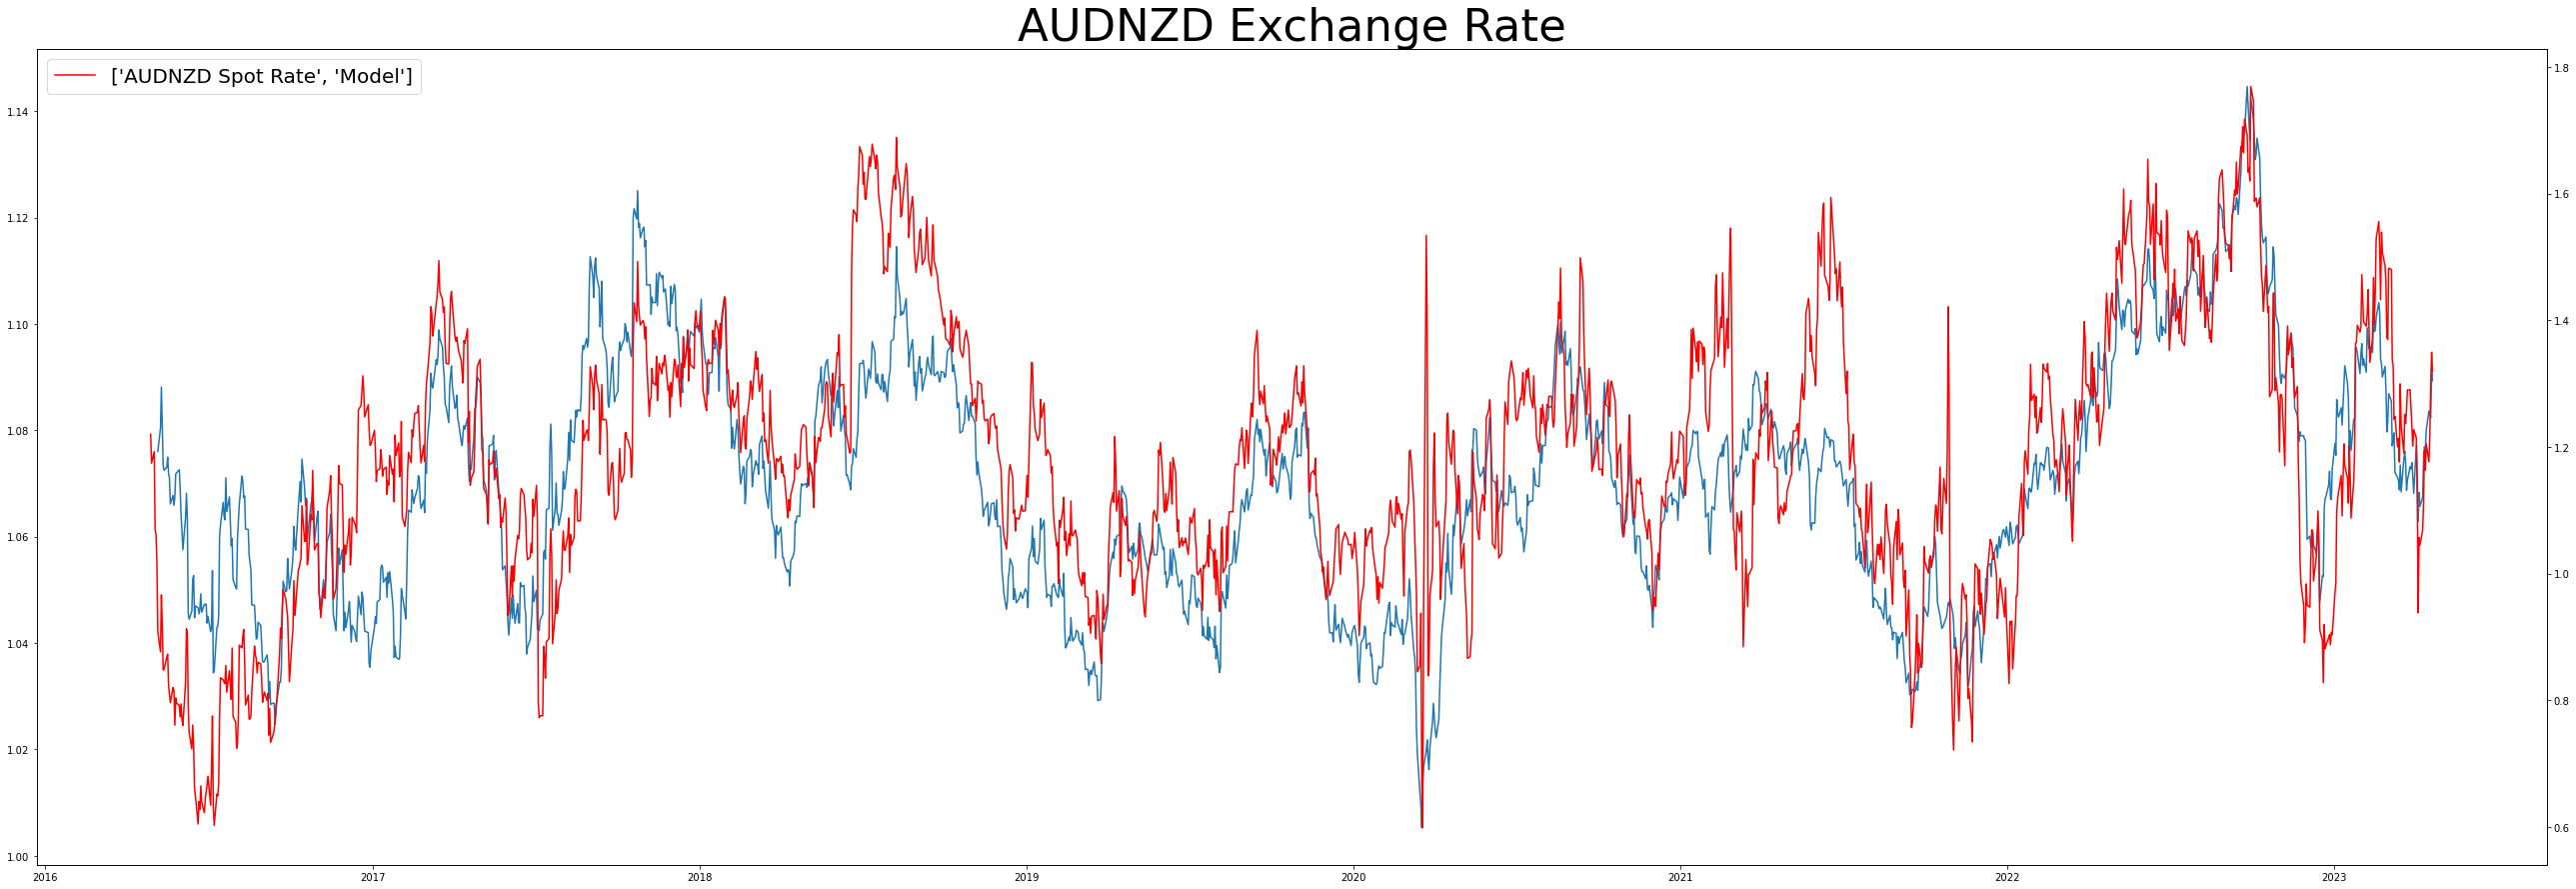

In [102]:
plt.figure(figsize=(45,15))

plt.title('AUDNZD Exchange Rate',fontsize=45)
plt.plot(imc_df['close'][-1807:])
plt.twinx()
plt.plot(-forecast.cumsum()*imc_df['close'][0]+ imc_df['close'].iloc[1807],color='red')

plt.legend([["AUDNZD Spot Rate","Model"]],fontsize=20)

plt.show()

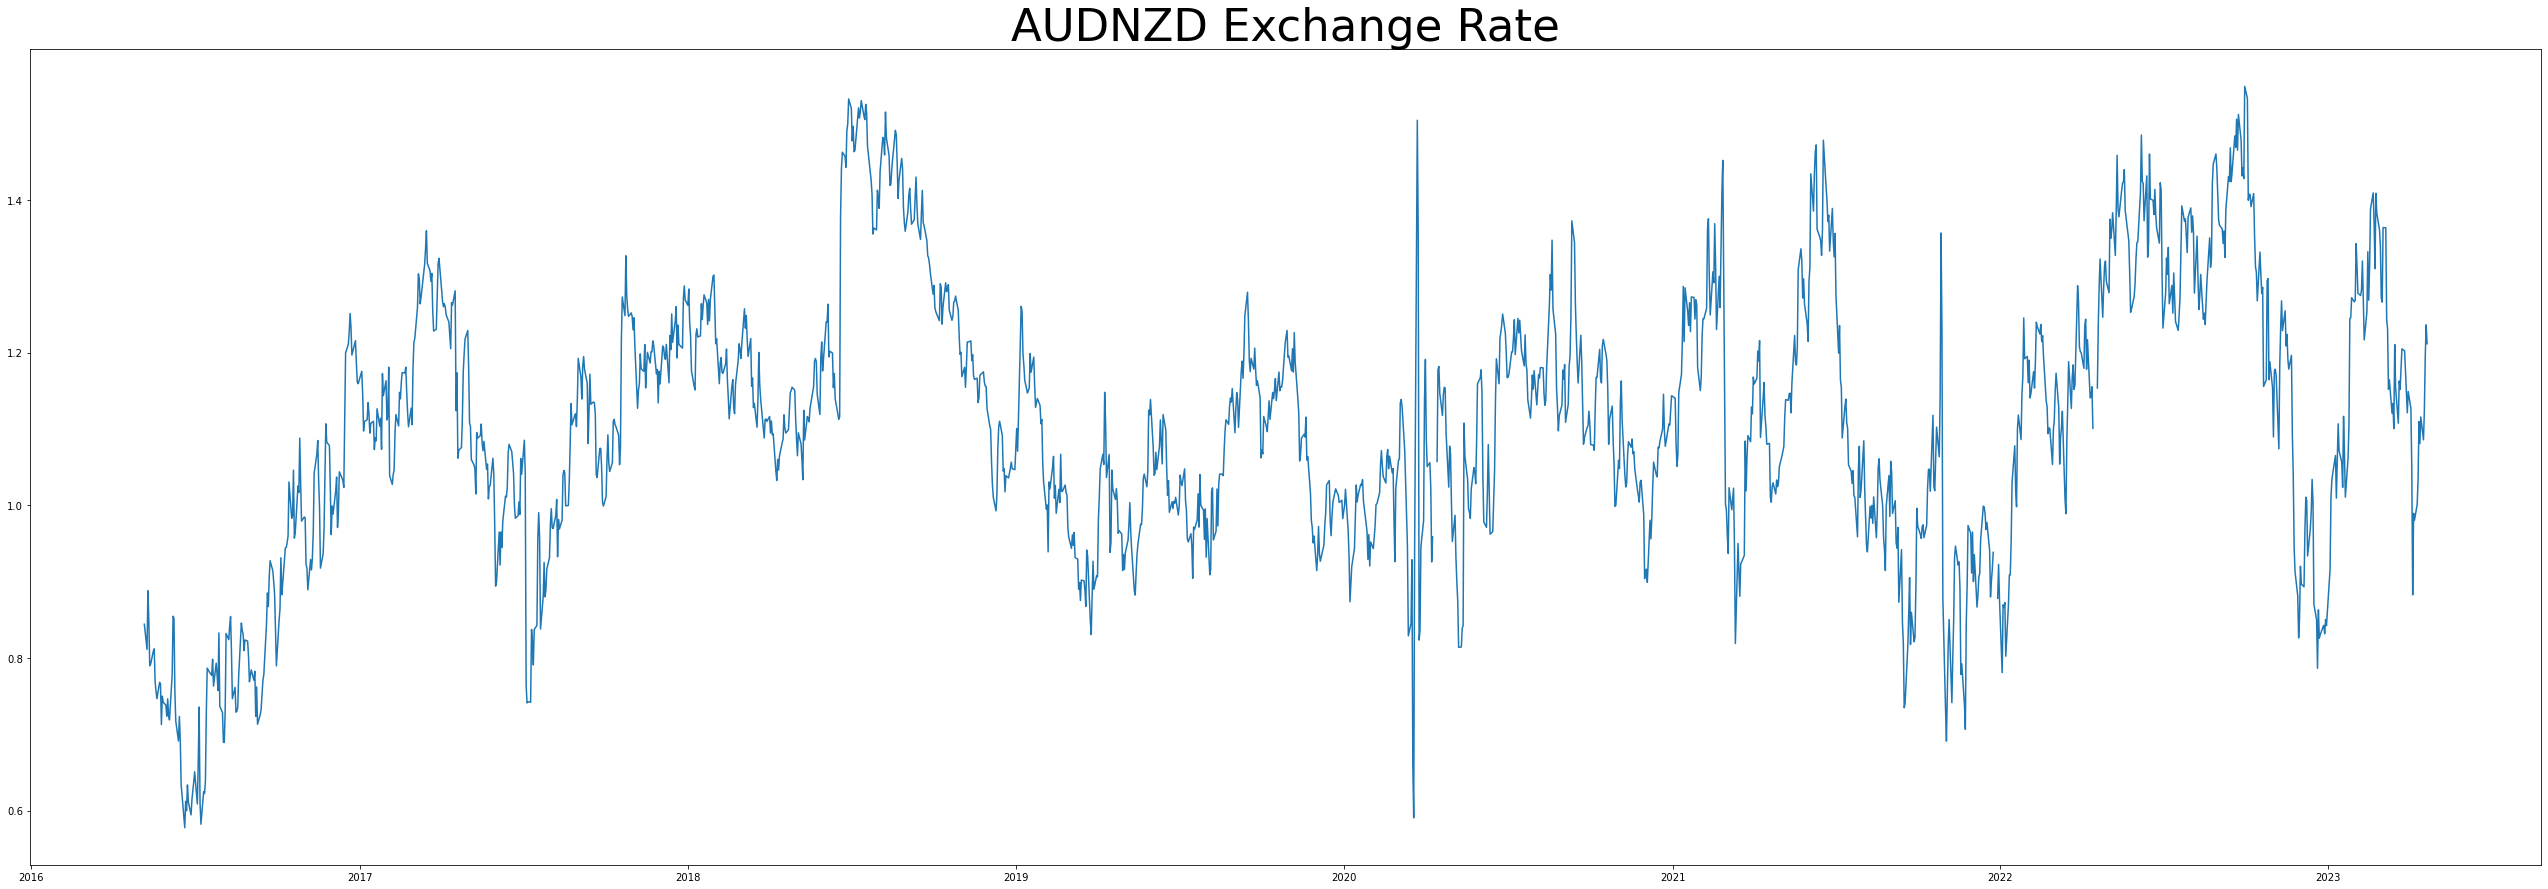

In [103]:
plt.figure(figsize=(45,15))

plt.title('AUDNZD Exchange Rate',fontsize=45)
plt.plot((-forecast.cumsum()*imc_df['close'][0]+ imc_df['close'].iloc[1807])/(imc_df['close'][-1807:]))

plt.show()

In [104]:

rs = (-forecast.cumsum()*imc_df['close'][0]+ imc_df['close'].iloc[1807])/(imc_df['close'][-1807:])

In [105]:
rs_diff = rs.diff(1)

In [106]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [107]:
rs_diff.dropna()

time
2016-05-08 21:00:00+00:00   -0.033016
2016-05-09 21:00:00+00:00    0.076946
2016-05-10 21:00:00+00:00   -0.038651
2016-05-11 21:00:00+00:00   -0.059663
2016-05-12 21:00:00+00:00    0.002114
                               ...   
2023-04-16 21:00:00+00:00   -0.030006
2023-04-17 21:00:00+00:00    0.038105
2023-04-18 21:00:00+00:00    0.071907
2023-04-19 21:00:00+00:00    0.040607
2023-04-20 21:00:00+00:00   -0.024697
Length: 1797, dtype: float64

c:\Users\James Stanley\anaconda3\envs\airflow-env\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


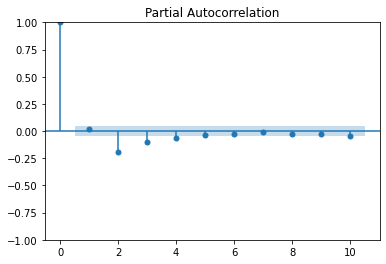

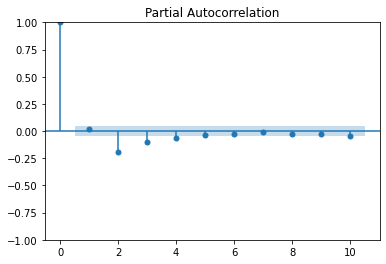

In [108]:
plot_pacf(rs_diff.dropna(), alpha=0.05, lags=10)

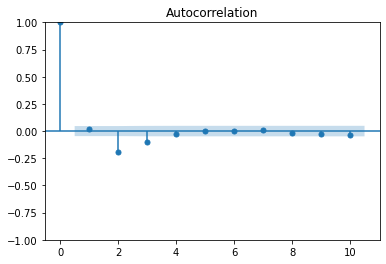

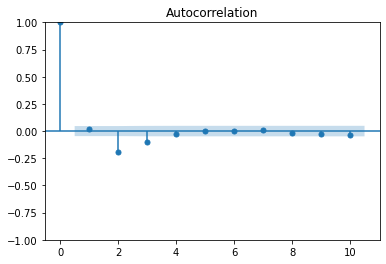

In [109]:
plot_acf(rs_diff.dropna(), alpha=0.05, lags=10)

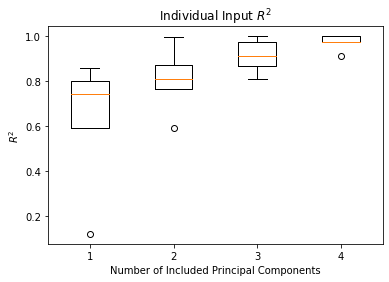

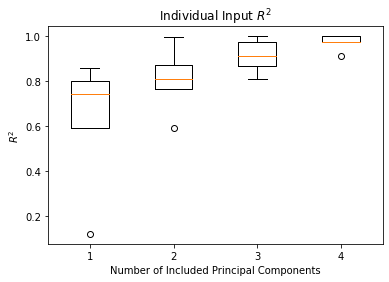

In [111]:
pc.plot_rsquare()

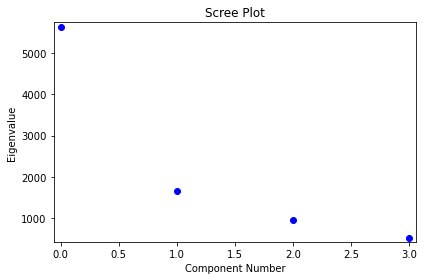

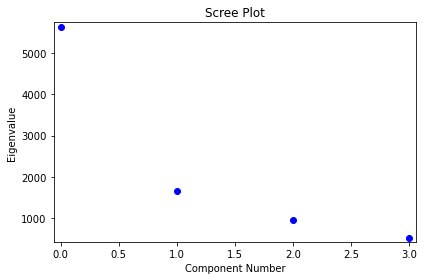

In [112]:
pc.plot_scree(log_scale=False)

In [113]:
pc.project(transform=True)

,close,"AU10Y-NZ10Y, TVC: Close","AU02Y-NZ02Y, TVC: Close","AU05Y-NZ05Y, TVC: Close","AU07Y-NZ07Y, TVC: Close"
time,,,,,
2016-04-27 21:00:00+00:00,-0.011970,-0.049480,-0.097601,-0.058581,-0.054735
2016-04-28 21:00:00+00:00,-0.006028,0.012314,0.012793,0.013977,0.012960
2016-05-01 21:00:00+00:00,0.003060,-0.000248,-0.010726,-0.000481,-0.000064
2016-05-02 21:00:00+00:00,-0.009507,-0.083356,-0.167751,-0.136447,-0.110565
2016-05-03 21:00:00+00:00,0.000755,0.054128,0.058000,0.055810,0.055800
...,...,...,...,...,...
2023-04-16 21:00:00+00:00,0.003646,0.001927,-0.065764,-0.030774,-0.013142
2023-04-17 21:00:00+00:00,-0.000501,-0.070912,-0.028958,-0.063858,-0.069407
2023-04-18 21:00:00+00:00,-0.000729,-0.030060,0.034956,0.025885,-0.003642
